In [4]:
import pandas as pd
df=pd.read_csv("/Users/chiara/Ironhack/week3/top50.csv",encoding='iso-8859-1') # it was not really an csv file - maybe special marks 


  
  

In [5]:
df.isna().sum()

Unnamed: 0          0
Track.Name          0
Artist.Name         0
Genre               0
Beats.Per.Minute    0
Energy              0
Danceability        0
Loudness..dB..      0
Liveness            0
Valence.            0
Length.             0
Acousticness..      0
Speechiness.        0
Popularity          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats.Per.Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
dtypes: int64(11), object(3)
memory usage: 5.6+ KB


In [7]:
## Wrangling & cleaning steps

unique_genre = df['Genre'].nunique()
print(unique_genre)

df['Genre'].unique()


21


array(['canadian pop', 'reggaeton flow', 'dance pop', 'pop', 'dfw rap',
       'trap music', 'country rap', 'electropop', 'reggaeton',
       'panamanian pop', 'canadian hip hop', 'latin', 'escape room',
       'pop house', 'australian pop', 'edm', 'atl hip hop', 'big room',
       'boy band', 'r&b en espanol', 'brostep'], dtype=object)

In [8]:


data = {'Genre': ['canadian pop', 'reggaeton flow', 'dance pop', 'pop', 'dfw rap',
                  'trap music', 'country rap', 'electropop', 'reggaeton',
                  'panamanian pop', 'canadian hip hop', 'latin', 'escape room',
                  'pop house', 'australian pop', 'edm', 'atl hip hop', 'big room',
                  'boy band', 'r&b en espanol', 'brostep']}

df_genre = pd.DataFrame(data)   # define a new df otherwise i overwrite the origin 

# Define genre mapping to broader categories
genre_map = {
    'canadian pop': 'Pop',
    'dance pop': 'Pop',
    'pop': 'Pop',
    'pop house': 'Pop',
    'australian pop': 'Pop',
    'reggaeton flow': 'Latin',
    'reggaeton': 'Latin',
    'panamanian pop': 'Latin',
    'latin': 'Latin',
    'r&b en espanol': 'Latin',
    'electropop': 'Electronic',
    'edm': 'Electronic',
    'brostep': 'Electronic',
    'big room': 'Electronic',
    'dfw rap': 'Hip Hop',
    'trap music': 'Hip Hop',
    'country rap': 'Hip Hop',
    'canadian hip hop': 'Hip Hop',
    'atl hip hop': 'Hip Hop',
    'escape room': 'Experimental',
    'boy band': 'Pop'
}


# Apply the mapping and create a new column 
df['Genre_Group'] = df['Genre'].map(genre_map)


print(df.groupby('Genre_Group').size())
df.head()

Genre_Group
Electronic       8
Experimental     1
Hip Hop          9
Latin           12
Pop             20
dtype: int64


,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity,Genre_Group
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,Pop
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,Latin
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,Pop
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,Pop
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,Hip Hop


In [9]:
#df.columns.strg.replace(".","_") Beats.Per.Minute	

df.rename(columns={"Beats.Per.Minute": "Beats_Per_Minute"}, inplace=True)
df.info()







<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats_Per_Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness.      50 non-null     int64 
 13  Popularity        50 non-null     int64 
 14  Genre_Group       50 non-null     object
dtypes: int64(11), object(4)
memory usage: 6.0+ KB


In [10]:
df.rename(columns={"Speechiness.": "Speechiness"}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        50 non-null     int64 
 1   Track.Name        50 non-null     object
 2   Artist.Name       50 non-null     object
 3   Genre             50 non-null     object
 4   Beats_Per_Minute  50 non-null     int64 
 5   Energy            50 non-null     int64 
 6   Danceability      50 non-null     int64 
 7   Loudness..dB..    50 non-null     int64 
 8   Liveness          50 non-null     int64 
 9   Valence.          50 non-null     int64 
 10  Length.           50 non-null     int64 
 11  Acousticness..    50 non-null     int64 
 12  Speechiness       50 non-null     int64 
 13  Popularity        50 non-null     int64 
 14  Genre_Group       50 non-null     object
dtypes: int64(11), object(4)
memory usage: 6.0+ KB


In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/Users/chiara/Ironhack/week3/mini_project_spotify/data/cleaned/top50_clean.csv')

df.head()

,Rank,Track_Name,Artist_Name,Genre,Beats_Per_Minute,Energy,Danceability,Loudness_dB,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,Genre_Group
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79,Pop
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92,Latin
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85,Pop
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86,Pop
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94,Hip Hop


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Pop'),
  Text(1, 0, 'Latin'),
  Text(2, 0, 'Hip Hop'),
  Text(3, 0, 'Electronic'),
  Text(4, 0, 'Experimental')])

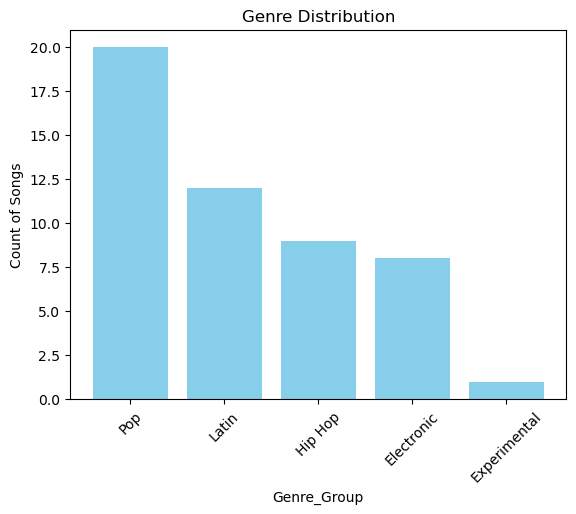

In [15]:
#bar chart - Check the genre distribution within the Top 20 songs

#plt.figure(figsize=(10, 6))  #  Sets the size of the figure

plt.bar(hypo["genre_group"],hypo["song_count"],color='skyblue')  # use the df name HYPO and the columns`names from SQL 


plt.title('Genre Distribution')
plt.xlabel('Genre_Group')
plt.ylabel('Count of Songs')
plt.xticks(rotation=45)  

In [13]:
hypo = pd.read_csv("hypo.csv")

In [14]:
hypo

,genre_group,song_count
0,Pop,20
1,Latin,12
2,Hip Hop,9
3,Electronic,8
4,Experimental,1
